## Recurrent Neural Network

#### Part 1 - Data Preprocessing

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [0]:
# Importing the training dataset 'MSFT.csv' with pandas
dataset_train = pd.read_csv('MSFT.csv')

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,26.549999,26.959999,26.389999,26.770000,22.688747,64731500
1,2012-01-04,26.820000,27.469999,26.780001,27.400000,23.222702,80516100
2,2012-01-05,27.379999,27.730000,27.290001,27.680000,23.460014,56081400
3,2012-01-06,27.530001,28.190001,27.530001,28.110001,23.824459,99455500
4,2012-01-09,28.049999,28.100000,27.719999,27.740000,23.510864,59706800


import the 'open' as an input numpy array

In [0]:
training_set = dataset_train.iloc[ :, 2:3].values 

In [6]:
training_set.shape

(1258, 1)

In [7]:
training_set

array([[26.959999],
       [27.469999],
       [27.73    ],
       ...,
       [63.400002],
       [63.200001],
       [62.990002]])

##### Feature Scaling

Use the MinMaxScaler with the feature range between 0 and 1

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax_sc = MinMaxScaler(feature_range = (0, 1))
# fit means that the method will take the min and max value from the array of numbers
# in normalization formula 'x_norm = x-min(x) / max(x) - min(x) '
training_set_scaled = minmax_sc.fit_transform(training_set)
print(training_set_scaled)

[[0.00880705]
 [0.02241793]
 [0.02935685]
 ...
 [0.98131849]
 [0.97598086]
 [0.97037641]]


#### Creating a data structure with 60 timesteps and 1 output.
Here you should write a for loop over the size of the training_set_scaled. <br />
At the first itteration, X_train should have first sixty elements of training_set_scaled. Whereas, y_train should have sixty-first element of training_set_scaled appended to it. <br />
This logic of lists filling should remain the same until the end of the loop.

In [0]:
X_train = []
y_train = []
# start a for loop using range from 
for i in range(60, 1258):
    # we will append the first 60 values to X
    X_train.append(training_set_scaled[i-60:i, 0])
    # and 61 value will be appended to y
    y_train.append(training_set_scaled[i, 0])

Here how should the lists look like after these operations

In [10]:
X_train

[array([0.00880705, 0.02241793, 0.02935685, 0.04163336, 0.03923141,
        0.04056581, 0.03602885, 0.03709637, 0.04323462, 0.05390982,
        0.04723782, 0.04830537, 0.08299976, 0.08860427, 0.0784628 ,
        0.08059784, 0.08193227, 0.0773953 , 0.07979723, 0.08193227,
        0.09127302, 0.09447561, 0.10061385, 0.09580998, 0.10301578,
        0.10781962, 0.11128903, 0.11128903, 0.11048842, 0.10221511,
        0.10034695, 0.13130505, 0.12516683, 0.13290638, 0.13477452,
        0.13237259, 0.12997067, 0.12997067, 0.14144652, 0.14331468,
        0.15372298, 0.15505738, 0.14464906, 0.14278092, 0.14117964,
        0.14891914, 0.14758477, 0.14865231, 0.16172939, 0.16680016,
        0.16840139, 0.16866833, 0.1595944 , 0.14731794, 0.14731794,
        0.1457166 , 0.14625039, 0.1595944 , 0.16199632, 0.16199632]),
 array([0.02241793, 0.02935685, 0.04163336, 0.03923141, 0.04056581,
        0.03602885, 0.03709637, 0.04323462, 0.05390982, 0.04723782,
        0.04830537, 0.08299976, 0.08860427, 0.

In [11]:
len(X_train)

1198

In [12]:
y_train

[0.14838537892675152,
 0.15425676952913703,
 0.15559114373074834,
 0.14838537892675152,
 0.1350414234064965,
 0.13344008896290593,
 0.12730187155863015,
 0.12169741451020599,
 0.1040833227671023,
 0.11769421184131867,
 0.12089674728841071,
 0.12169741451020599,
 0.13290638198309002,
 0.12489992326928001,
 0.13477451654055284,
 0.16706699138155823,
 0.15665869113046949,
 0.15719245148632122,
 0.1518548479278049,
 0.14945292632647245,
 0.1491860728365646,
 0.14625039087938074,
 0.15238860828365652,
 0.14144652098869814,
 0.14064588045492066,
 0.13183883458336898,
 0.11289036863865409,
 0.11075532721524761,
 0.11208970141685881,
 0.11716042479744926,
 0.1310382207376093,
 0.11769421184131867,
 0.11128903419506364,
 0.09847881234264244,
 0.09554310369744068,
 0.08486789658040816,
 0.08433418960059225,
 0.08673605782588889,
 0.07392583597346769,
 0.0712570075061918,
 0.07285834194978225,
 0.08246597497907593,
 0.07606087739687428,
 0.07445959632931942,
 0.06218308145671425,
 0.0573792916300

In [13]:
len(y_train)

1198

by this time X_train and y_train were the lists. Now we will make them as numpy array. <br />
X_train has the lines where each line is a sequence of 60 prev days <br />
y_train is our trained output. The last member of list is the prediction of the next lists last member <br />
Use the numpy functionality in order to convert X_train and y_train into numpy arrays

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

Here how should the lists look like after these operations

In [15]:
X_train

array([[0.00880705, 0.02241793, 0.02935685, ..., 0.1595944 , 0.16199632,
        0.16199632],
       [0.02241793, 0.02935685, 0.04163336, ..., 0.16199632, 0.16199632,
        0.14838538],
       [0.02935685, 0.04163336, 0.03923141, ..., 0.16199632, 0.14838538,
        0.15425677],
       ...,
       [0.82519351, 0.82652788, 0.8361356 , ..., 1.        , 0.98505479,
        0.99919941],
       [0.82652788, 0.8361356 , 0.83346685, ..., 0.98505479, 0.99919941,
        0.98131849],
       [0.8361356 , 0.83346685, 0.83666938, ..., 0.99919941, 0.98131849,
        0.97598086]])

In [16]:
X_train.shape

(1198, 60)

In [17]:
y_train

array([0.14838538, 0.15425677, 0.15559114, ..., 0.98131849, 0.97598086,
       0.97037641])

In [18]:
y_train.shape

(1198,)

#### Reshaping

In [0]:
# here potentially you can add another dimension as an indicator, for instance the Close price (but we don't do it here)
# the first parameter here is a np array that we want to reshape and the next ones is the new form of 3 dimensional array
# check the Keras documentation
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
X_train.shape

(1198, 60, 1)

In [21]:
X_train

array([[[0.00880705],
        [0.02241793],
        [0.02935685],
        ...,
        [0.1595944 ],
        [0.16199632],
        [0.16199632]],

       [[0.02241793],
        [0.02935685],
        [0.04163336],
        ...,
        [0.16199632],
        [0.16199632],
        [0.14838538]],

       [[0.02935685],
        [0.04163336],
        [0.03923141],
        ...,
        [0.16199632],
        [0.14838538],
        [0.15425677]],

       ...,

       [[0.82519351],
        [0.82652788],
        [0.8361356 ],
        ...,
        [1.        ],
        [0.98505479],
        [0.99919941]],

       [[0.82652788],
        [0.8361356 ],
        [0.83346685],
        ...,
        [0.98505479],
        [0.99919941],
        [0.98131849]],

       [[0.8361356 ],
        [0.83346685],
        [0.83666938],
        ...,
        [0.99919941],
        [0.98131849],
        [0.97598086]]])

#### Part 2 - Building the RNN

In [22]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Initialising the RNN

In [0]:
# we are predicting a continous value, hence we'll call it regressor!
regressor = Sequential()

LSTM ARCHITECTURE

In [24]:
# Adding the first LSTM layer and some Dropout regularisation
# units are the number of LSTM cells, actually neurons
# 50 is a fairly enough big number to satisfy our needs to predict the stock price
# the last: input_shape = (X_train.shape[1], 1) are the last two columns: which are timesteps and indicators
N = 50
regressor.add(LSTM(units = N, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# DROPOUT is regularization. Dropout rate. It is number of neurons which you want to ignore. Here 20%. During forward and backward propogation
regressor.add(Dropout(rate = 0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = N, return_sequences = True))
regressor.add(Dropout(rate=0.2)) # 20% again

In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = N, return_sequences = True))
regressor.add(Dropout(rate=0.2)) # 20% again

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = N))
regressor.add(Dropout(0.2))

In [0]:
# Adding the output layer
# here we use Dense class and put a number of neurons. How many neurons there should be assuming that we are having the regression problem?
regressor.add(Dense(units = 1))

# Compiling the RNN
# adam would be a good optimizer for this problem, find more info about it in the Keras docs
# which of the loss functions should we assuming that we have the regression problem here,
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0461
Epoch 2/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 3/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 4/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 5/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 6/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 7/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 8/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 9/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 10/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 11/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 12/50
1198/1198 [=============

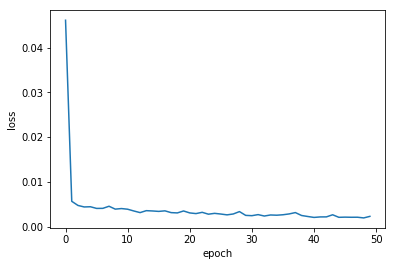

In [30]:
plt.plot(regressor.history.epoch,regressor.history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('MSFT_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [32]:
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,62.790001,62.840000,62.130001,62.580002,60.926991,20694100
1,2017-01-04,62.480000,62.750000,62.119999,62.299999,60.654381,21340000
2,2017-01-05,62.189999,62.660000,62.029999,62.299999,60.654381,24876000
3,2017-01-06,62.299999,63.150002,62.040001,62.840000,61.180119,19922900
4,2017-01-09,62.759998,63.080002,62.540001,62.639999,60.985405,20256600


In [33]:
real_stock_price

array([[62.790001],
       [62.48    ],
       [62.189999],
       [62.299999],
       [62.759998],
       [62.73    ],
       [62.610001],
       [63.060001],
       [62.619999],
       [62.68    ],
       [62.669998],
       [62.240002],
       [62.669998],
       [62.700001],
       [63.200001],
       [63.950001],
       [64.120003],
       [65.389999],
       [65.690002],
       [64.860001]])

In [0]:

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = minmax_sc.transform(inputs)


In [35]:
dataset_total

0       26.549999
1       26.820000
2       27.379999
3       27.530001
4       28.049999
5       27.930000
6       27.430000
7       27.870001
8       27.930000
9       28.400000
10      28.309999
11      28.160000
12      28.820000
13      29.549999
14      29.469999
15      29.070000
16      29.610001
17      29.450001
18      28.969999
19      29.660000
20      29.790001
21      29.900000
22      30.139999
23      30.040001
24      30.150000
25      30.260000
26      30.680000
27      30.639999
28      30.629999
29      30.330000
          ...    
1248    62.950001
1249    62.560001
1250    63.689999
1251    63.430000
1252    63.840000
1253    63.450001
1254    63.209999
1255    63.400002
1256    62.860001
1257    62.959999
0       62.790001
1       62.480000
2       62.189999
3       62.299999
4       62.759998
5       62.730000
6       62.610001
7       63.060001
8       62.619999
9       62.680000
10      62.669998
11      62.240002
12      62.669998
13      62.700001
14      63

In [36]:
inputs

array([[0.83026431],
       [0.83319989],
       [0.83480122],
       [0.83426744],
       [0.81345084],
       [0.80250875],
       [0.81371766],
       [0.82012284],
       [0.82465975],
       [0.82305852],
       [0.82385914],
       [0.8980518 ],
       [0.88897787],
       [0.91326394],
       [0.9121965 ],
       [0.9068589 ],
       [0.89084601],
       [0.89484926],
       [0.88977857],
       [0.88577534],
       [0.87803579],
       [0.85455041],
       [0.88470779],
       [0.90525756],
       [0.89057918],
       [0.90338943],
       [0.84334139],
       [0.86442492],
       [0.84601024],
       [0.86228985],
       [0.90152127],
       [0.91139581],
       [0.90392319],
       [0.91673344],
       [0.91753403],
       [0.89858556],
       [0.89965311],
       [0.90792645],
       [0.9135309 ],
       [0.89351489],
       [0.86602626],
       [0.8825728 ],
       [0.90205503],
       [0.89084601],
       [0.92527358],
       [0.92207104],
       [0.93915137],
       [0.957

In [37]:
inputs.shape

(80, 1)

In [0]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = minmax_sc.inverse_transform(predicted_stock_price)


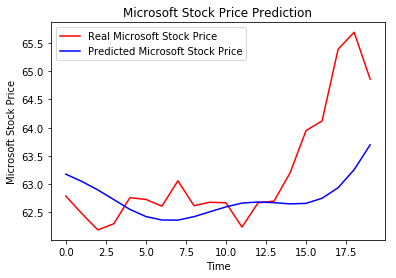

In [39]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()